In [1]:
import pandas as pd
import numpy as np

# Data Loading 

In [2]:
train = pd.read_hdf('train.h5')

# Feature Columns 

In [3]:
excl = ['id', 'y', 'timestamp']
origin_features = [feature for feature in train.columns if feature not in excl]
acc_features = [feature + '_acc' for feature in origin_features]

# Add Accumulation Features 

In [4]:
train.fillna(train.mean(), inplace=True)
train.sort_values(['id', 'timestamp'], inplace=True)
train['id_diff'] = train.id.diff()

In [5]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,id_diff
131062,0,167,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.091034,-0.081567,-0.07287,0.049083,0.005236,-0.017,-0.97353,0.000388,-0.007108,NaN
131895,0,168,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.091034,-0.081567,-0.07287,0.049083,0.005236,-0.017,-0.97353,0.000388,0.001950,0.0
132728,0,169,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.091034,-0.081567,-0.07287,0.049083,0.005236,-0.017,-0.97353,0.000388,0.017724,0.0
133561,0,170,-0.230583,4.880956e-01,0.935920,0.028222,-0.083071,-0.240929,-570375360.0,0.212425,...,0.000000,0.000000,0.00000,-0.160478,0.005236,0.000,0.00000,0.000388,0.012934,0.0
134393,0,171,-0.230583,4.880956e-01,0.935920,0.028222,-0.083071,-0.240929,-570375360.0,0.212425,...,0.000000,0.000000,0.00000,-0.160478,0.005236,0.000,0.00000,0.000388,-0.025229,0.0


# Does accumulation make sense? 

In [9]:
id = 40

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

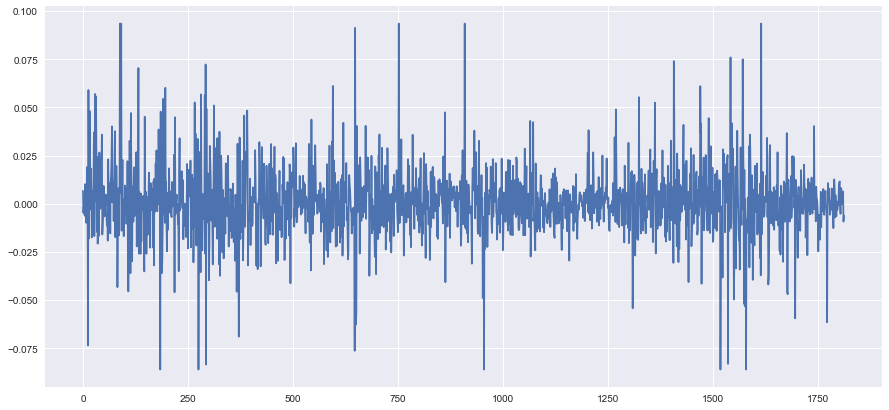

In [10]:
plt.figure(figsize=(15,7))
plt.plot(train.loc[train.id==id, 'timestamp'], train.loc[train.id==id, 'y'])

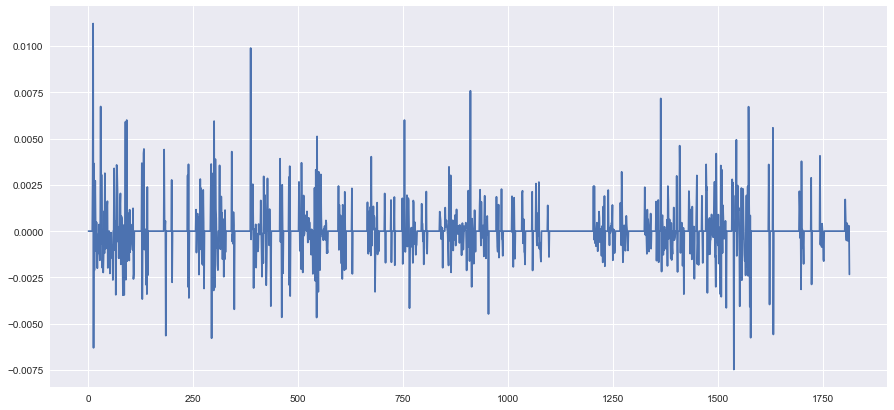

In [17]:
plt.figure(figsize=(15,7))
plt.plot(train.loc[train.id==id, 'timestamp'], train.loc[train.id==id, 'technical_20'].diff())

### last 3 stamps 

In [11]:
tec20_l1 = train.loc[train.id==id, 'technical_20'].shift()
tec20_l2 = tec20_l1.shift()
tec20_l3 = tec20_l2.shift()

In [12]:
last_3 = tec20_l1 + tec20_l2 + tec20_l3

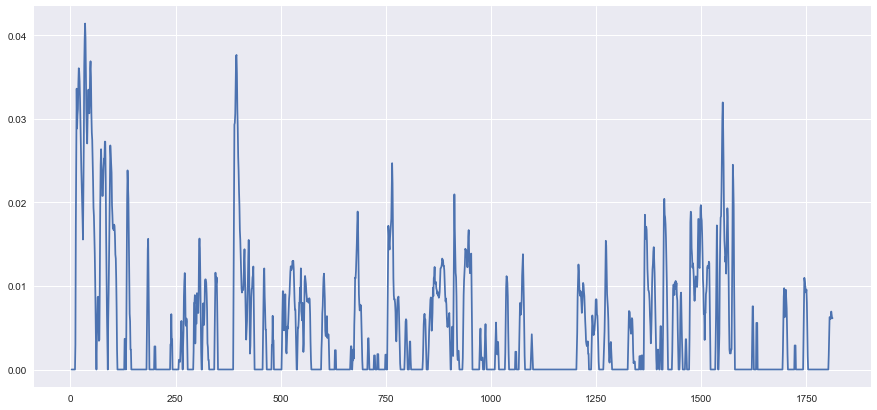

In [13]:
plt.figure(figsize=(15,7))
plt.plot(train.loc[train.id==id, 'timestamp'], last_3)

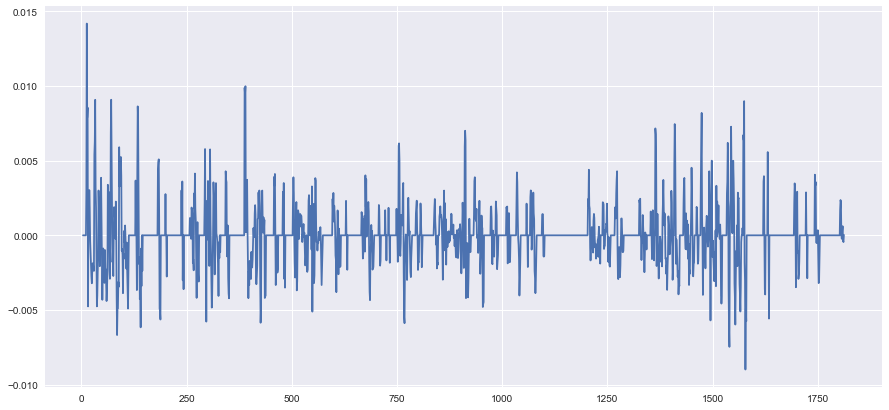

In [14]:
plt.figure(figsize=(15,7))
plt.plot(train.loc[train.id==id, 'timestamp'], last_3.diff())

In [21]:
np.corrcoef(last_3.fillna(0),  train.loc[train.id==id, 'y'])[0][1]

-0.027180002101823832

In [35]:
corr = {}
ids =train.id.unique().shape[0]
for i, col in enumerate(origin_features):
    med = train.loc[train.id==id, col].median()
    med = med if med == med else 0
    l1 = train.loc[train.id==id, col].shift()
    l2 = l1.shift()
    l = (l1 + l2).fillna(med)
    correlation = np.abs(np.corrcoef(l, train.loc[train.id==id, 'y'])[0][1])
    corr[col] = correlation
    print(i, col)

0 derived_0
1 derived_1
2 derived_2
3 derived_3
4 derived_4
5 fundamental_0
6 fundamental_1
7 fundamental_2
8 fundamental_3
9 fundamental_5
10 fundamental_6
11 fundamental_7
12 fundamental_8
13 fundamental_9
14 fundamental_10
15 fundamental_11
16 fundamental_12
17 fundamental_13
18 fundamental_14
19 fundamental_15
20 fundamental_16
21 fundamental_17
22 fundamental_18
23 fundamental_19
24 fundamental_20
25 fundamental_21
26 fundamental_22
27 fundamental_23
28 fundamental_24
29 fundamental_25
30 fundamental_26
31 fundamental_27
32 fundamental_28
33 fundamental_29
34 fundamental_30
35 fundamental_31
36 fundamental_32
37 fundamental_33
38 fundamental_34
39 fundamental_35
40 fundamental_36
41 fundamental_37
42 fundamental_38
43 fundamental_39
44 fundamental_40
45 fundamental_41
46 fundamental_42
47 fundamental_43
48 fundamental_44
49 fundamental_45
50 fundamental_46
51 fundamental_47
52 fundamental_48
53 fundamental_49
54 fundamental_50
55 fundamental_51
56 fundamental_52
57 fundamental_53


In [8]:
import twosigmafunc

In [36]:
corr = twosigmafunc.sort_dict(corr, key=lambda x : np.abs(x[1]))

In [37]:
corr

[('fundamental_41', 0.084835075232483542),
 ('fundamental_26', 0.06035894801918535),
 ('fundamental_15', 0.057179883915686305),
 ('fundamental_42', 0.056351371477214182),
 ('technical_21', 0.054473067196926551),
 ('fundamental_10', 0.051171069294387216),
 ('fundamental_57', 0.048695771483486895),
 ('fundamental_56', 0.046085393105319776),
 ('technical_34', 0.043488105948868941),
 ('fundamental_2', 0.042024884150519942),
 ('fundamental_53', 0.038393932272529879),
 ('fundamental_33', 0.037509681745611312),
 ('fundamental_55', 0.036940369838772476),
 ('fundamental_36', 0.033432737706771472),
 ('fundamental_7', 0.033253195254553641),
 ('derived_1', 0.03205285181588733),
 ('fundamental_11', 0.031858026964716318),
 ('derived_3', 0.030736377366442514),
 ('fundamental_63', 0.026015822577833411),
 ('fundamental_13', 0.025904375991726382),
 ('fundamental_18', 0.025683083887413607),
 ('technical_10', 0.02534159075669935),
 ('technical_33', 0.02363554115831093),
 ('fundamental_45', 0.0236256234690

In [5]:
for feature, acc in zip(origin_features, acc_features):
    med = train[feature].median()
    med = med if med == med else 0
    l1 = train[feature].shift()
    l1.loc[train.id_diff!=0] = med
    l2 = l1.shift()
    l2.loc[train.id_diff!=0] = med
    l = (l1 + l2)
    train[acc] = l

In [8]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35_acc,technical_36_acc,technical_37_acc,technical_38_acc,technical_39_acc,technical_40_acc,technical_41_acc,technical_42_acc,technical_43_acc,technical_44_acc
131062,0,167,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.332468,-0.257545,-2.079647e-11,-8.510921e-13,-1.096706e-15,-0.043025,0.011509,0.000000,-2.041476,0.001164
131895,0,168,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.324945,-0.257545,-9.103397e-02,-8.156685e-02,-7.287001e-02,0.020400,0.012909,-0.017000,-2.334514,0.001164
132728,0,169,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-570375360.0,-0.162295,...,-0.317423,-0.257545,-1.820679e-01,-1.631337e-01,-1.457400e-01,0.083825,0.014309,-0.033999,-2.627552,0.001164
133561,0,170,-0.230583,4.880956e-01,0.935920,0.028222,-0.083071,-0.240929,-570375360.0,0.212425,...,-0.309900,-0.257545,-2.731019e-01,-2.447006e-01,-2.186100e-01,0.147250,0.015709,-0.050999,-2.920590,0.001164
134393,0,171,-0.230583,4.880956e-01,0.935920,0.028222,-0.083071,-0.240929,-570375360.0,0.212425,...,0.335146,0.555963,-1.820679e-01,-1.631337e-01,-1.457400e-01,-0.062312,0.015709,-0.033999,-1.947060,0.001164


In [6]:
corr = {}
for i, col in enumerate(acc_features):
    correlation = np.corrcoef(train[col], train.y)[0][1]
    corr[col] = correlation

In [9]:
corr = twosigmafunc.sort_dict(corr, key=lambda x : np.abs(x[1]))
corr

[('technical_30_acc', 0.01134715451655045),
 ('technical_27_acc', -0.0082821229187003149),
 ('technical_19_acc', -0.0078265610181063767),
 ('fundamental_11_acc', 0.0065681974098388048),
 ('technical_35_acc', -0.0064154854707385413),
 ('technical_11_acc', -0.006229989916543572),
 ('fundamental_53_acc', 0.0060464154502205538),
 ('technical_36_acc', -0.006042846921275118),
 ('technical_2_acc', -0.0059445899461389971),
 ('fundamental_18_acc', 0.0050491448629012585),
 ('technical_43_acc', -0.0048515086051245078),
 ('fundamental_51_acc', 0.0047907811808721818),
 ('technical_6_acc', -0.0045876780925098041),
 ('technical_20_acc', -0.0045383833589287374),
 ('fundamental_62_acc', -0.0040034556704228817),
 ('technical_0_acc', 0.0038041259346768743),
 ('technical_29_acc', -0.0037974126040787445),
 ('technical_14_acc', -0.0037578623736512552),
 ('technical_37_acc', 0.0034601248837756804),
 ('technical_13_acc', 0.0034270227306135307),
 ('fundamental_55_acc', 0.003310983958166285),
 ('fundamental_60_

In [10]:
X_train = train.loc[train.timestamp <=905, origin_features + acc_features]
y_train = train.loc[train.timestamp <=905, 'y']
X_test = train.loc[train.timestamp > 905, origin_features + acc_features]
y_test = train.loc[train.timestamp > 905, 'y']

In [11]:
del train

# Using Linear Models 

In [12]:
from sklearn.linear_model import Ridge, LinearRegression

In [13]:
from twosigmafunc import R_score
acc_score = {}
for acc_feature in acc_features:
    ridge = Ridge()
    ridge.fit(X_train[acc_feature].reshape(-1,1), y_train)
    y_pred = ridge.predict(X_test[acc_feature].reshape(-1,1))
    score = R_score(y_pred, y_test)
    acc_score[acc_feature] = score

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [14]:
acc_score = sorted(acc_score.items(), key=lambda x : x[1], reverse=True)

In [15]:
acc_score[:5]

[('technical_27_acc', 0.0077893846815640542),
 ('technical_30_acc', 0.0076835524479721582),
 ('technical_19_acc', 0.0068554805866552441),
 ('technical_35_acc', 0.0061534273295556731),
 ('technical_36_acc', 0.0059353973077539857)]

In [26]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train[['technical_27_acc','technical_19_acc']], y_train)
y_pred = lr.predict(X_test[['technical_27_acc', 'technical_19_acc']])
score = R_score(y_pred, y_test)
score

-0.0046188061593693481

In [27]:
ridge.fit(X_train['technical_20'].reshape(-1,1), y_train)
y_pred = ridge.predict(X_test['technical_20'].reshape(-1,1))
score = R_score(y_pred, y_test)
score

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


0.016670342201779959